# Insurance Data Exploration (Task 1)
## Comprehensive EDA for AlphaCare Insurance Challenge

## 1. Configuration & Setup
Initialize project environment and load dependencies


In [1]:
import sys
from pathlib import Path
import os
import matplotlib.pyplot as plt

# Set project root (assuming notebook is in notebooks/ folder)
project_root = Path().resolve().parent
os.chdir(project_root)  # Change working directory to project root
sys.path.append(str(project_root))  # Add to Python path

print(f"Working Directory: {os.getcwd()}")
print(f"Python Path: {sys.path}")

Working Directory: C:\Users\Lidya\Documents\projects\alphacare-insurance-challenge
Python Path: ['C:\\Users\\Lidya\\AppData\\Local\\Programs\\Python\\Python39\\python39.zip', 'C:\\Users\\Lidya\\AppData\\Local\\Programs\\Python\\Python39\\DLLs', 'C:\\Users\\Lidya\\AppData\\Local\\Programs\\Python\\Python39\\lib', 'C:\\Users\\Lidya\\AppData\\Local\\Programs\\Python\\Python39', 'c:\\Users\\Lidya\\Documents\\projects\\venv', '', 'c:\\Users\\Lidya\\Documents\\projects\\venv\\lib\\site-packages', 'c:\\Users\\Lidya\\Documents\\projects\\venv\\lib\\site-packages\\win32', 'c:\\Users\\Lidya\\Documents\\projects\\venv\\lib\\site-packages\\win32\\lib', 'c:\\Users\\Lidya\\Documents\\projects\\venv\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Lidya\\Documents\\projects\\alphacare-insurance-challenge']


In [2]:
from pathlib import Path

# Add project root to Python path
project_root = str(Path().resolve().parent)
if project_root not in sys.path:
    sys.path.append(project_root)

# Now import using full package path
from src.utils.config import ConfigManager
from src.data_scripts.loader import InsuranceDataLoader
from src.data_scripts.cleaner import DataCleaner
from src.analysis.eda import InsuranceEDA
from src.utils.visualization import Visualizer

import pandas as pd
import seaborn as sns

# Initialize components
config = ConfigManager()
visualizer = Visualizer()
eda = InsuranceEDA(visualizer)

## 2. Data Loading & Cleaning
Load raw data and apply cleaning pipeline

In [3]:
loader = InsuranceDataLoader(config)
cleaner = DataCleaner(config.get('cleaning_strategies'))

raw_df = loader.load_raw_data()
cleaned_df = loader.create_derived_features(raw_df)
final_df = cleaner.clean(cleaned_df)

2025-06-16 17:11:44 [info     ] Loading data from: data\raw\MachineLearningRating_v3.txt
2025-06-16 17:11:52 [info     ] Loaded data with shape: (1000098, 52)
2025-06-16 17:11:52 [info     ] Derived features created successfully
2025-06-16 17:11:52 [info     ] Data cleaning completed       


## 3. Data Quality Assessment
Generate comprehensive quality report

In [4]:
quality_report = eda.generate_quality_report(final_df)
quality_report['missing_values'].sort_values('missing_pct', ascending=False)

2025-06-16 17:12:00 [info     ] Generated data quality report 


,missing_count,missing_pct
NumberOfVehiclesInFleet,1000098,100.000000
CrossBorder,999400,99.930207
RiskCategory,997457,99.735926
LossRatio,997455,99.735726
TotalClaims,997305,99.720727
CustomValueEstimate,779642,77.956560
CapitalOutstanding,779484,77.940762
Rebuilt,641901,64.183810
WrittenOff,641901,64.183810
Converted,641901,64.183810


## 4. Risk Factor Analysis
Explore key risk dimensions

In [5]:
# Provincial risk profile
provincial_risk = final_df.groupby('Province').agg(
    Policies=('PolicyID', 'nunique'),
    AvgLossRatio=('LossRatio', 'mean'),
    ClaimFrequency=('HasClaim', 'mean')
).sort_values('AvgLossRatio', ascending=False)

# Vehicle risk analysis
vehicle_risk = final_df.groupby('make').agg(
    Policies=('PolicyID', 'nunique'),
    AvgClaim=('TotalClaims', 'mean')).query('Policies > 50').sort_values('AvgClaim', ascending=False)

# Temporal trends
temporal_df = eda._prepare_temporal_data(final_df)

## 5. Key Visualizations
Create 3 required insights

2025-06-16 17:15:24 [info     ] Saved visualization: ./reports/figures\provincial_risk.png


C:\Users\Lidya\Documents\projects\alphacare-insurance-challenge\src\utils\visualization.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


2025-06-16 17:15:25 [info     ] Saved visualization: ./reports/figures\vehicle_risk.png


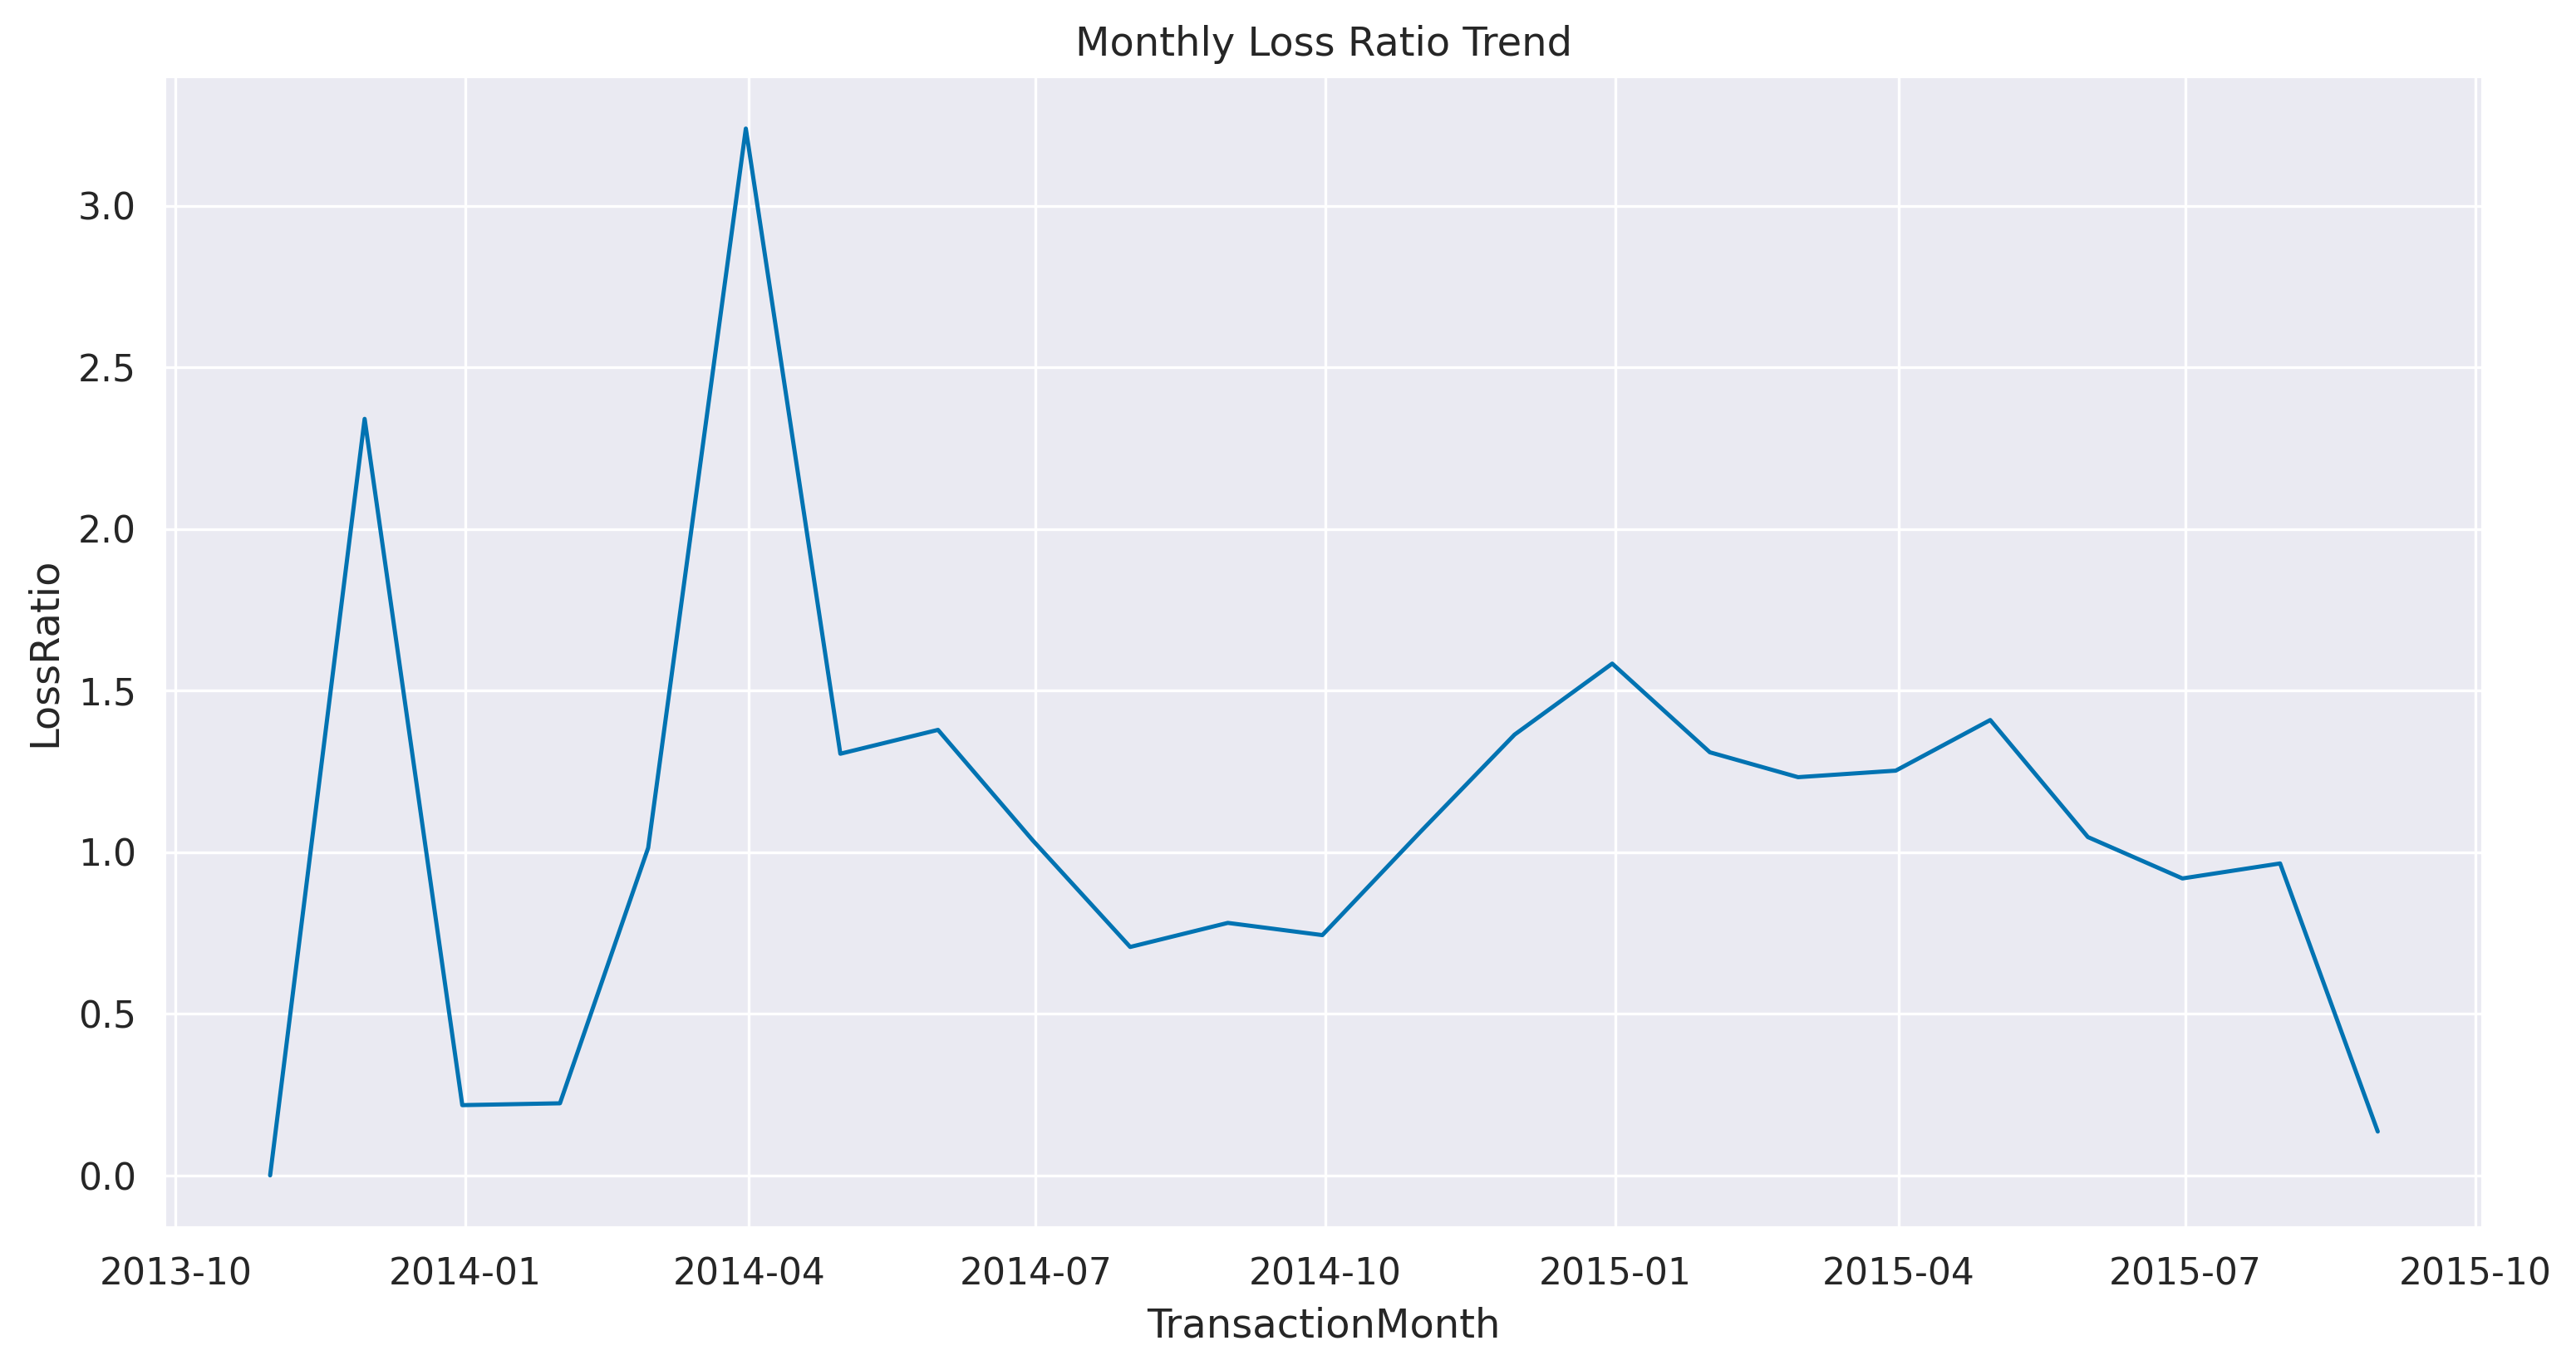

In [9]:
# Insight 1: Provincial Risk
eda.visualizer.plot_provincial_risk(provincial_risk.reset_index(), './reports/figures')

# Insight 2: Vehicle Risk
eda.visualizer.plot_vehicle_risk(vehicle_risk.head(10).reset_index(), './reports/figures')

# Insight 3: Temporal Trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='TransactionMonth', y='LossRatio', data=temporal_df)
plt.title('Monthly Loss Ratio Trend')
plt.savefig('./reports/figures/temporal_trends.png')